# Multiple Linear Regression With OLS

In [59]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from numpy.linalg import inv

# Importing data

In [60]:
startup_50 = pd.read_csv("data/50_Startups.csv")

In [61]:
startup_50.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Dummy coding categorical variables

In [62]:
n = pd.get_dummies(startup_50.State)
startup_50 = pd.concat([startup_50, n], axis=1)
startup_50 = startup_50.drop(['State'],axis=1)

# Visualization to check correlation between independent variables and dependent variable

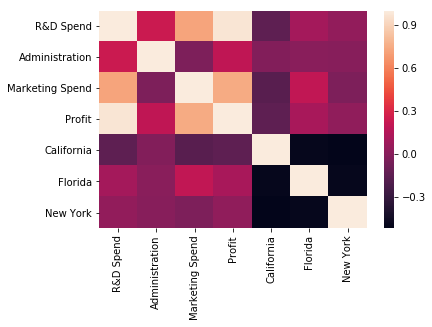

In [63]:
import seaborn as sns
corr = startup_50.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Drop variables with no linear correlation

In [64]:
startup_50 = startup_50.drop(['Administration','Marketing Spend','California','Florida','New York'],axis=1)
startup_50.head()

,R&D Spend,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


# Splitting data into x and y

In [65]:
x = startup_50.iloc[:,:-1]
y = startup_50.iloc[:,-1]

In [67]:
x.head()

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [68]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# Adding constant to x

In [69]:
x.insert(loc=0, column='Const', value=np.ones(np.shape(x)[0]))

In [86]:
x.head()

,Const,R&D Spend
0,1.0,165349.20
1,1.0,162597.70
2,1.0,153441.51
3,1.0,144372.41
4,1.0,142107.34


# Splitting data into train and test

In [71]:
def train_test_set(df_x,df_y, test_portion):
    import random as rnd

    tot_ix = range(len(df_x))
    tot_iy = range(len(df_y))
    test_ix = sorted(rnd.sample(tot_ix, int(test_portion * len(df_x))))
    train_ix = list(set(tot_ix) ^ set(test_ix))
    test_iy = sorted(rnd.sample(tot_iy, int(test_portion * len(df_y))))
    train_iy = list(set(tot_iy) ^ set(test_iy))

    x_test = df_x.iloc[test_ix]
    x_train = df_x.iloc[train_ix]
    y_test = df_y.iloc[test_ix]
    y_train = df_y.iloc[train_ix]

    return x_train, y_train, x_test, y_test

In [72]:
x_train, y_train, x_test, y_test = train_test_set(x,y, 0.2)
x_train.shape

(40, 2)

In [88]:
x_train = np.array(x_train)
x_train.shape

(40, 2)

In [89]:
y_train = np.array(y_train)
y_train.shape

(40,)

# Calculating the coefficents beta = (X.T *  X)**-1 * X.T * Y  using Train data

In [77]:
x_train_t = np.transpose(x_train)
x_train_t.shape

(2, 40)

In [78]:
x_mul = np.dot(x_train_t,x_train)
x_mul.shape

(2, 2)

In [79]:
x_mul_inv = inv(x_mul)
x_mul_inv.shape

(2, 2)

In [80]:
x_mul_t = np.dot(x_mul_inv,x_train_t)
x_mul_t.shape

(2, 40)

In [81]:
beta = np.dot(x_mul_t,y_train)
beta

array([4.84241631e+04, 8.47890193e-01])

# Predicting the results on test

In [82]:
x_test = np.array(x_test)
x_test.shape

(10, 2)

In [83]:
y_pred = np.dot(x_test,beta)
y_pred

array([170836.11369338, 152998.59831998, 133782.93070567, 126423.60842262,
        87788.37256037,  87438.99940631,  72727.88410511,  85790.64151867,
        49539.528738  ,  48883.76198378])

# Goodness of the model

In [93]:
# Calculate R^2 explicitly
yminusf2=(y_test-y_pred)**2
sserr=sum(yminusf2)
mean=float(sum(y_test))/float(len(y_test))
yminusmean2=(y_test-mean)**2
sstot=sum(yminusmean2)
R2=1.-(sserr/sstot)
print("R2 Score:",R2)

R2 Score: 0.9468284353933644


# Visualization

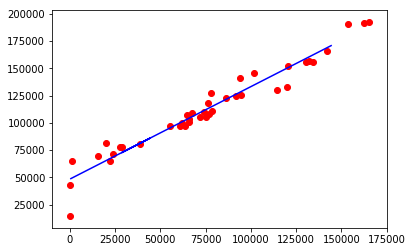

In [85]:
plt.figure(1)
plt.plot(x_test[:,1], y_pred, color='b')
plt.scatter(x_train[:,1], y_train, color='r')
plt.show()